# 1-proba-置信概率

(300, 2) (300,)
              precision    recall  f1-score   support

         0.0       0.97      0.95      0.96        40
         1.0       0.94      0.97      0.96        35

    accuracy                           0.96        75
   macro avg       0.96      0.96      0.96        75
weighted avg       0.96      0.96      0.96        75

[[3.00000090e-14 1.00000000e+00]
 [3.00000090e-14 1.00000000e+00]
 [9.77169945e-01 2.28300546e-02]
 [5.34996479e-01 4.65003521e-01]
 [9.99095551e-03 9.90009044e-01]
 [1.02237627e-11 1.00000000e+00]
 [9.58469206e-01 4.15307939e-02]]


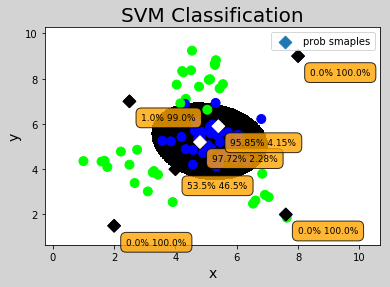

In [3]:

import numpy as np
import sklearn.model_selection as ms
import sklearn.svm as svm
import sklearn.metrics as sm
import matplotlib.pyplot as mp

data=np.loadtxt('../data/ml_data/multiple2.txt',delimiter=',',dtype='f8')
x=data[:,:-1]
y=data[:,-1]
print(x.shape,y.shape)

#拆分测试集与训练集
train_x,test_x,train_y,test_y=ms.train_test_split(x,y,test_size=0.25,random_state=7)
# print(train_x,test_x,train_y,test_y)
#训练svm训练器                     
model=svm.SVC(kernel='rbf',C=600,gamma=0.01,probability=True)#C:正则强度 gamma:正态分布标准差  超参数probability
model.fit(train_x,train_y)
#预测
pre_test_y=model.predict(test_x)
#输出分类结果
cr=sm.classification_report(test_y,pre_test_y)
print(cr)


#拆分
l, r = x[:, 0].min() - 1, x[:, 0].max() + 1
b, t = x[:, 1].min() - 1, x[:, 1].max() + 1
#把总体切成500份

n = 500

#绘制分类边界线
grid_x, grid_y = np.meshgrid(np.linspace(l, r, n), np.linspace(b, t, n))
samples = np.column_stack((grid_x.ravel(), grid_y.ravel()))
grid_z = model.predict(samples)
#变维(改变成二位矩阵)
grid_z = grid_z.reshape(grid_x.shape)

#绘制样本空间
mp.figure('SVM', facecolor='lightgray')
mp.title('SVM Classification', fontsize=20)
mp.xlabel('x', fontsize=14)
mp.ylabel('y', fontsize=14)
mp.tick_params(labelsize=10)
mp.pcolormesh(grid_x, grid_y, grid_z, cmap='gray')
mp.scatter(test_x[:, 0], test_x[:, 1], c=test_y, cmap='brg', s=80)

#新增样本点，输出置信概率
prob_x = np.array([
    [2, 1.5],
    [8, 9],
    [4.8, 5.2],
    [4, 4],
    [2.5, 7],
    [7.6, 2],
    [5.4, 5.9]])
#预测每个样本的类别
pred_prob_y=model.predict(prob_x)
#输出每个样本的置信概率
probs=model.predict_proba(prob_x)
print(probs)
# 绘制每个测试样本，并给出标注
mp.scatter(prob_x[:,0], prob_x[:,1], c=pred_prob_y, cmap='jet_r', s=80, marker='D')
for i in range(len(probs)):
    mp.annotate(
        '{}% {}%'.format(
            round(probs[i, 0] * 100, 2),
            round(probs[i, 1] * 100, 2)),
        xy=(prob_x[i, 0], prob_x[i, 1]),
        xytext=(12, -12),
        textcoords='offset points',
        horizontalalignment='left',
        verticalalignment='top',
        fontsize=9,
        bbox={'boxstyle': 'round,pad=0.6',
              'fc': 'orange', 'alpha': 0.8})

mp.scatter(prob_x[:,0],prob_x[:,1],c=pred_prob_y,s=80,marker='D',cmap='gray_r',label='prob smaples')


mp.legend()
mp.show()

# 2-gridsearch-网格搜索

(300, 2) (300,)


/home/tarena/.local/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/tarena/.local/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/tarena/.local/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/tarena/.local/lib/python3.6/site-packages/sklearn/svm/base

{'C': 1, 'gamma': 1, 'kernel': 'rbf'}
0.9511111111111111
SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)
{'C': 1, 'kernel': 'linear'} 》 0.6577777777777778
{'C': 10, 'kernel': 'linear'} 》 0.6533333333333333
{'C': 100, 'kernel': 'linear'} 》 0.6577777777777778
{'C': 1000, 'kernel': 'linear'} 》 0.6622222222222223
{'degree': 2, 'kernel': 'poly'} 》 0.8533333333333334
{'degree': 3, 'kernel': 'poly'} 》 0.8755555555555555
{'C': 1, 'gamma': 1, 'kernel': 'rbf'} 》 0.9511111111111111
{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'} 》 0.9333333333333333
{'C': 1, 'gamma': 0.01, 'kernel': 'rbf'} 》 0.7555555555555555
{'C': 1, 'gamma': 0.001, 'kernel': 'rbf'} 》 0.5111111111111111
{'C': 10, 'gamma': 1, 'kernel': 'rbf'} 》 0.9422222222222222
{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'} 》 0.9511111111111111
{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'

No handles with labels found to put in legend.


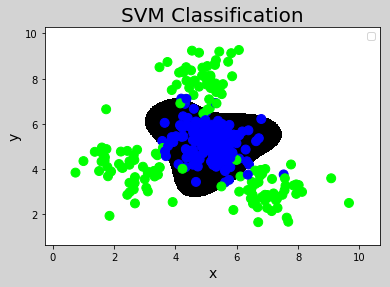

In [6]:
import numpy as np
import sklearn.model_selection as ms
import sklearn.svm as svm
import sklearn.metrics as sm
import matplotlib.pyplot as mp

data=np.loadtxt('../data/ml_data/multiple2.txt',delimiter=',',dtype='f8')
x=data[:,:-1]
y=data[:,-1]
print(x.shape,y.shape)

#拆分测试集与训练集
train_x,test_x,train_y,test_y=ms.train_test_split(x,y,test_size=0.25,random_state=7)
# print(train_x,test_x,train_y,test_y)
#训练svm训练器
model=svm.SVC()

#基于网格搜索，获取最优模型
params=[{'kernel':['linear'],'C':[1,10,100,1000]},{'kernel':['poly'],'degree':[2,3]},{'kernel':['rbf'],"C":[1,10,100,1000],'gamma':[1,0.1,0.01,0.001]}]
model=ms.GridSearchCV(model,params,cv=5)
#训练模型(1.选最优模型   2.使用最优模型训练)
model.fit(train_x,train_y)
#拿到网格搜索模型训练后的副产品
print(model.best_params_)
print(model.best_score_)
print(model.best_estimator_)
#输出每组超参数组合的交叉验证得分
for param,score in zip(model.cv_results_['params'],model.cv_results_['mean_test_score']):
    print(param,'》',score)

#预测
pre_test_y=model.predict(test_x)
#输出分类结果
cr=sm.classification_report(test_y,pre_test_y)
print(cr)


#拆分
l, r = x[:, 0].min() - 1, x[:, 0].max() + 1
b, t = x[:, 1].min() - 1, x[:, 1].max() + 1
#把总体切成500份
n = 500

#绘制分类边界线
grid_x, grid_y = np.meshgrid(np.linspace(l, r, n), np.linspace(b, t, n))
samples = np.column_stack((grid_x.ravel(), grid_y.ravel()))
grid_z = model.predict(samples)
#变维(改变成二位矩阵)
grid_z = grid_z.reshape(grid_x.shape)

#绘制样本空间
mp.figure('SVM', facecolor='lightgray')
mp.title('SVM Classification', fontsize=20)
mp.xlabel('x', fontsize=14)
mp.ylabel('y', fontsize=14)
mp.tick_params(labelsize=10)
mp.pcolormesh(grid_x, grid_y, grid_z, cmap='gray')
mp.scatter(x[:, 0], x[:, 1], c=y, cmap='brg', s=80)
mp.legend()
mp.show()

# 3-event-事件预测

In [7]:
import numpy as np
import sklearn.model_selection as ms
import sklearn.svm as svm
import sklearn.metrics as sm
import matplotlib.pyplot as mp
import sklearn.preprocessing as sp

class DigitEncoder():
    def fit_transform(self,y):
        return y.astype('i4')
    def transform(self,y):
        return y.astype('i4')
    def inverse_transform(self,y):
        return y.astype('str')

#读取数据，整理样本集
data=[]
with open('../data/ml_data/event.txt','r') as f:
    for i, row in enumerate(f.readlines()):
        data.append(row.split(','))
data=np.array(data)


#整理数据集
data=np.delete(data,1,axis=1)
print(data.shape,data[0])

#遍历每一列，为每一列做编码，整理适合训练的样本
data=data.T
x,y=[],[]
encoders=[]
for row in range(len(data)):
    #确定当前数组使用那种encoder进行编码
    if data[row][0].isdigit():              #判断字符串是否是数字字符串
        encoder=DigitEncoder()
    else:
        encoder=sp.LabelEncoder()
    #整理输入输出集
    if row <len(data)-1:
        x.append(encoder.fit_transform(data[row]))
    else:
        y=encoder.fit_transform(data[row])
    encoders.append(encoder)
x=np.array(x).T
y=np.array(y).T
print(x[0],x.shape,y[0],x.shape)

#选择svm模型进行分类模型训练
model=svm.SVC(kernel='rbf',class_weight='balanced')
train_x,test_x,train_y,test_y=ms.train_test_split(x,y,test_size=0.25,random_state=7)
model.fit(train_x,train_y)
pred_test_y=model.predict(test_x)
print((test_y==pred_test_y).sum()/test_y.size)
print(sm.classification_report(test_y,pred_test_y))

#模拟真实环境
data=[['Tuesday', '13:30:00', '21', '23']]
data=np.array(data).T
test_x=[]
for row in range(len(data)):
    encoder=encoders[row]
    test_x.append(encoder.transform(data[row]))
test_x=np.array(test_x).T
pred_test_y=model.predict(test_x)
print(encoders[-1].inverse_transform(pred_test_y))


(5040, 5) ['Sunday' '00:00:00' '0' '0' 'noevent\n']
[3 0 0 0] (5040, 4) 1 (5040, 4)


/home/tarena/.local/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.9476190476190476
              precision    recall  f1-score   support

           0       0.10      0.07      0.08        43
           1       0.97      0.98      0.97      1217

    accuracy                           0.95      1260
   macro avg       0.54      0.52      0.53      1260
weighted avg       0.94      0.95      0.94      1260

['noevent\n']


# 4-交通流量预测

In [8]:
import numpy as np
import sklearn.preprocessing as sp
import sklearn.model_selection as ms
import sklearn.svm as svm
import sklearn.metrics as sm

class DigitEncoder():
    def fit_transform(self, y):
        return y.astype(int)

    def transform(self, y):
        return y.astype(int)

    def inverse_transform(self, y):
        return y.astype(str)

data = []
# 回归
data = np.loadtxt('../data/ml_data/traffic.txt', delimiter=',', dtype='U20')
data = data.T
encoders, x = [], []
for row in range(len(data)):
    if data[row][0].isdigit():
        encoder = DigitEncoder()
    else:
        encoder = sp.LabelEncoder()
    if row < len(data) - 1:
        x.append(encoder.fit_transform(data[row]))
    else:
        y = encoder.fit_transform(data[row])
    encoders.append(encoder)
x = np.array(x).T
train_x, test_x, train_y, test_y = \
    ms.train_test_split(x, y, test_size=0.25, random_state=5)
# 支持向量机回归器
model = svm.SVR(kernel='rbf', C=10, epsilon=0.2)
model.fit(train_x, train_y)
pred_test_y = model.predict(test_x)
print(sm.r2_score(test_y, pred_test_y))
print(sm.mean_absolute_error(test_y, pred_test_y))
data = [['Tuesday', '13:35', 'San Francisco', 'yes']]
data = np.array(data).T
x = []
for row in range(len(data)):
    encoder = encoders[row]
    x.append(encoder.transform(data[row]))
x = np.array(x).T
pred_y = model.predict(x)
print(int(pred_y))

/home/tarena/.local/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.6379517119380995
5.915904214686347
27


# 5-kmeans-k均值聚类

(200, 2)


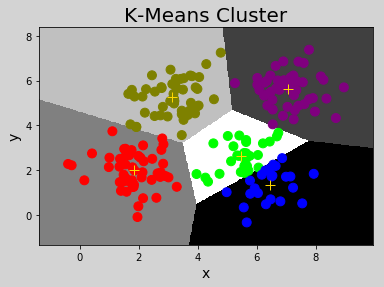

In [14]:
import numpy as np
import sklearn.cluster as sc
import matplotlib.pyplot as mp

x = np.loadtxt('../data/ml_data/multiple3.txt', delimiter=',')
print(x.shape)
# K均值聚类器
model = sc.KMeans(n_clusters=5)
model.fit(x)
#返回每个训练样本的标签
labels=model.labels_
# 获取训练结果的聚类中心
centers = model.cluster_centers_
n = 500
l, r = x[:, 0].min() - 1, x[:, 0].max() + 1
b, t = x[:, 1].min() - 1, x[:, 1].max() + 1
grid_x = np.meshgrid(np.linspace(l, r, n),
                     np.linspace(b, t, n))
flat_x = np.column_stack((grid_x[0].ravel(), grid_x[1].ravel()))
flat_y = model.predict(flat_x)
grid_y = flat_y.reshape(grid_x[0].shape)
pred_y = model.predict(x)

#画图
mp.figure('K-Means Cluster', facecolor='lightgray')
mp.title('K-Means Cluster', fontsize=20)
mp.xlabel('x', fontsize=14)
mp.ylabel('y', fontsize=14)
mp.tick_params(labelsize=10)
mp.pcolormesh(grid_x[0], grid_x[1], grid_y, cmap='gray')
mp.scatter(x[:, 0], x[:, 1], c=pred_y, cmap='brg', s=80,label='samples')
mp.scatter(centers[:, 0], centers[:, 1], marker='+', c='gold', s=100, linewidth=1)
mp.show()

# 6-quant-图像量化

(786432,) [162.24875036  75.15778621  20.58799551 217.03358472]
(786432,) [ 22.21656984 198.35439226  81.02129274]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(786432,) [194.1641483   46.52176729]


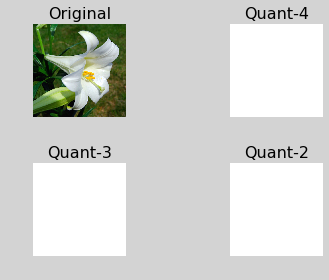

In [5]:
6
import numpy as np
import scipy.misc as sm
import scipy.ndimage as sn
import sklearn.cluster as sc
import matplotlib.pyplot as mp


# 通过K均值聚类量化图像中的颜色
def quant(image, n_clusters):
    x = image.reshape(-1, 1)
    model = sc.KMeans(n_clusters=n_clusters)
    model.fit(x)
    y = model.labels_
    centers = model.cluster_centers_.ravel()
    print(y.shape,centers)
    return centers[y].reshape(image.shape)


original = sm.imread('../data/ml_data/lily.jpg',True)
quant4 = quant(original, 4)
quant3 = quant(original, 3)
quant2 = quant(original, 2)
mp.figure('Image Quant', facecolor='lightgray')
mp.subplot(221)
mp.title('Original', fontsize=16)
mp.axis('off')
mp.imshow(original, cmap='gray')
mp.subplot(222)
mp.title('Quant-4', fontsize=16)
mp.axis('off')
mp.imshow(quant4, cmap='gray')
mp.subplot(223)
mp.title('Quant-3', fontsize=16)
mp.axis('off')
mp.imshow(quant3, cmap='gray')
mp.subplot(224)
mp.title('Quant-2', fontsize=16)
mp.axis('off')
mp.imshow(quant2, cmap='gray')
mp.tight_layout()
mp.show()

# 7-均值漂移

轮廓系数: 0.5773232071896658
centers: [[3.07897959 5.15326531]
 [6.9823913  5.59804348]
 [5.868      2.21622222]
 [1.97733333 2.00644444]]


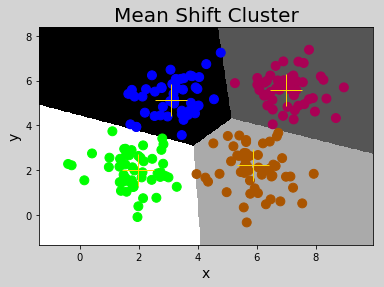

In [22]:
import numpy as np
import sklearn.cluster as sc
import matplotlib.pyplot as mp

x = np.loadtxt('../data/ml_data/multiple3.txt', delimiter=',')
# 量化带宽，决定每次调整概率密度函数的步进量
bw = sc.estimate_bandwidth(x, n_samples=len(x), quantile=0.2)
# 均值漂移聚类器
model = sc.MeanShift(bandwidth=bw, bin_seeding=True)
model.fit(x)

#计算轮廓系数
s=sm.silhouette_score(x,pred_y,sample_size=len(x),metric='euclidean')
print('轮廓系数:',s)

#返回每个训练样本的标签
labels=model.labels_
centers = model.cluster_centers_
print('centers:',centers)
n = 500
l,  r = x[:, 0].min() - 1, x[:, 0].max() + 1
b,  t = x[:, 1].min() - 1, x[:, 1].max() + 1
grid_x = np.meshgrid(np.linspace(l, r, n),
                     np.linspace(b, t, n))
flat_x = np.column_stack((grid_x[0].ravel(), grid_x[1].ravel()))
flat_y = model.predict(flat_x)
grid_y = flat_y.reshape(grid_x[0].shape)
pred_y = model.predict(x)
mp.figure('Mean Shift Cluster', facecolor='lightgray')
mp.title('Mean Shift Cluster', fontsize=20)
mp.xlabel('x', fontsize=14)
mp.ylabel('y', fontsize=14)
mp.tick_params(labelsize=10)
mp.pcolormesh(grid_x[0], grid_x[1], grid_y, cmap='gray')
mp.scatter(x[:, 0], x[:, 1], c=pred_y, cmap='brg', s=80)
mp.scatter(centers[:, 0], centers[:, 1], marker='+', c='gold', s=1000, linewidth=1)
mp.show()

# 8-AgglomerativeClustering-凝聚层次

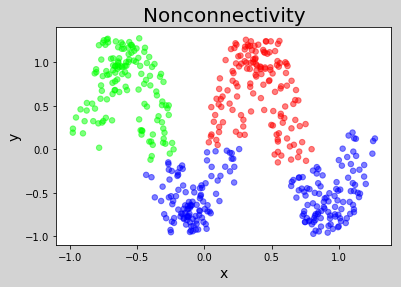

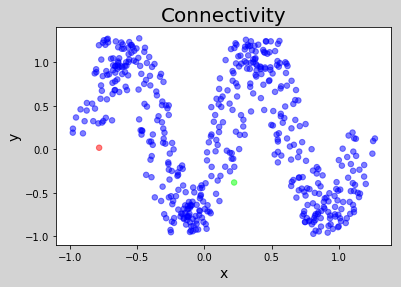

In [16]:
import numpy as np
import sklearn.cluster as sc
import sklearn.neighbors as nb
import matplotlib.pyplot as mp

n_samples = 500
x = np.linspace(-1, 1, n_samples)
y = np.sin(x * 2 * np.pi)
n = 0.3 * np.random.rand(n_samples, 2)
x = np.column_stack((x, y)) + n
# 无连续性的凝聚层次聚类器
model_nonc = sc.AgglomerativeClustering( linkage='average', n_clusters=3)
pred_y_nonc = model_nonc.fit_predict(x)
# 近邻筛选器
conn = nb.kneighbors_graph( x, 10, include_self=False)
# 有连续性的凝聚层次聚类器
model_conn = sc.AgglomerativeClustering(linkage='average', n_clusters=3, connectivity=conn)
pred_y_conn = model_conn.fit_predict(x)
mp.figure('Nonconnectivity', facecolor='lightgray')
mp.title('Nonconnectivity', fontsize=20)
mp.xlabel('x', fontsize=14)
mp.ylabel('y', fontsize=14)
mp.tick_params(labelsize=10)
mp.scatter(x[:, 0], x[:, 1], c=pred_y_nonc, cmap='brg', alpha=0.5, s=30)
mp.figure('Connectivity', facecolor='lightgray')
mp.title('Connectivity', fontsize=20)
mp.xlabel('x', fontsize=14)
mp.ylabel('y', fontsize=14)
mp.tick_params(labelsize=10)
mp.scatter(x[:, 0], x[:, 1], c=pred_y_conn, cmap='brg', alpha=0.5, s=30)
mp.show()

# 9-silhouette_score- 轮廓系数

(200, 2)
[[6.44       1.33956522]
 [5.47821429 2.63321429]
 [3.22510638 5.34382979]
 [1.83226415 2.11150943]
 [7.07326531 5.61061224]]
0.5197985623269675


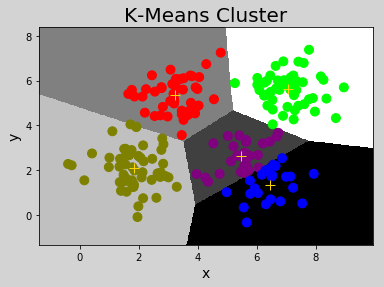

In [18]:
import numpy as np
import sklearn.cluster as sc
import matplotlib.pyplot as mp
import sklearn.metrics as sm

x = np.loadtxt('../data/ml_data/multiple3.txt', delimiter=',')
print(x.shape)
# K均值聚类器
model = sc.KMeans(n_clusters=5)
model.fit(x)

#返回每个训练样本的标签
labels=model.labels_
# 获取训练结果的聚类中心
centers = model.cluster_centers_
print(centers)

#计算轮廓系数
s=sm.silhouette_score(x,pred_y,sample_size=len(x),metric='euclidean')
print(s)
n = 500
l, r = x[:, 0].min() - 1, x[:, 0].max() + 1
b, t = x[:, 1].min() - 1, x[:, 1].max() + 1
grid_x = np.meshgrid(np.linspace(l, r, n),
                     np.linspace(b, t, n))
flat_x = np.column_stack((grid_x[0].ravel(), grid_x[1].ravel()))
flat_y = model.predict(flat_x)
grid_y = flat_y.reshape(grid_x[0].shape)
pred_y = model.predict(x)

#画图
mp.figure('K-Means Cluster', facecolor='lightgray')
mp.title('K-Means Cluster', fontsize=20)
mp.xlabel('x', fontsize=14)
mp.ylabel('y', fontsize=14)
mp.tick_params(labelsize=10)
mp.pcolormesh(grid_x[0], grid_x[1], grid_y, cmap='gray')
mp.scatter(x[:, 0], x[:, 1], c=pred_y, cmap='brg', s=80,label='samples')
mp.scatter(centers[:, 0], centers[:, 1], marker='+', c='gold', s=100, linewidth=1)
mp.show()